In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
#플롯에서 한글이 깨지는 경우가 없도록 폰트 지정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 데이터 전처리

In [5]:
#데이터 가져오기
df = pd.read_table('시군구별_인프라수_청년수.txt', sep=',', encoding='cp949')
df.head(5)

,Unnamed: 0,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널
0,0,서울_종로구,"32,943",496,28.0,3,60.0,0,1,23,5730,24,201,0,19.0,0.0,367.0,0.0
1,1,서울_중구,"28,277",572,16.0,2,48.0,0,1,17,5383,62,281,1,18.0,0.0,77.0,0.0
2,2,서울_용산구,"52,554",319,19.0,1,47.0,0,1,9,5056,23,104,9,18.0,1.0,48.0,0.0
3,3,서울_성동구,"67,271",457,21.0,2,69.0,0,1,10,4562,22,62,3,19.0,0.0,31.0,0.0
4,4,서울_광진구,"91,126",558,76.0,3,76.0,0,1,12,5609,26,66,0,17.0,0.0,25.0,1.0


In [6]:
#앞에 번호 삭제
df = df.drop(columns=['Unnamed: 0'],axis=1)

#int로 변경
df = df.astype({'사회스포츠': 'int'})
df = df.astype({'초중고': 'int'})
df = df.astype({'행정기관': 'int'})
df = df.astype({'법원, 교도소': 'int'})
df = df.astype({'문화시설_영화/공연/미술관박물관': 'int'})
df = df.astype({'버스터미널': 'int'})

#str >> int
df['청년인구'] = df['청년인구'].str.replace(",","")

df = df.astype({'청년인구' : 'int'})
 
#모든 인프라를 합쳐 '인프라수' 행 추가
df['인프라수'] = df['병원']+df['사회스포츠']+df['대학교']+df['초중고']+df['공항']+df['소방서']+df['경찰서']+df['소형상업시설(음식점_카페_학원_편의점)']+df['대형상업시설']+df['숙박시설']+df['기차역']+df['행정기관']+df['법원, 교도소']+df['문화시설_영화/공연/미술관박물관']+df['버스터미널']
df.head(2)

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
0,서울_종로구,32943,496,28,3,60,0,1,23,5730,24,201,0,19,0,367,0,6952
1,서울_중구,28277,572,16,2,48,0,1,17,5383,62,281,1,18,0,77,0,6478


In [7]:
df2 = df.reindex(columns=['시군구','청년인구','인프라수'])

In [8]:
cols = list(df2.columns)
df_x = df2[cols[:3]]
df_x.head()

,시군구,청년인구,인프라수
0,서울_종로구,32943,6952
1,서울_중구,28277,6478
2,서울_용산구,52554,5655
3,서울_성동구,67271,5259
4,서울_광진구,91126,6470


### 계층적 군집분석

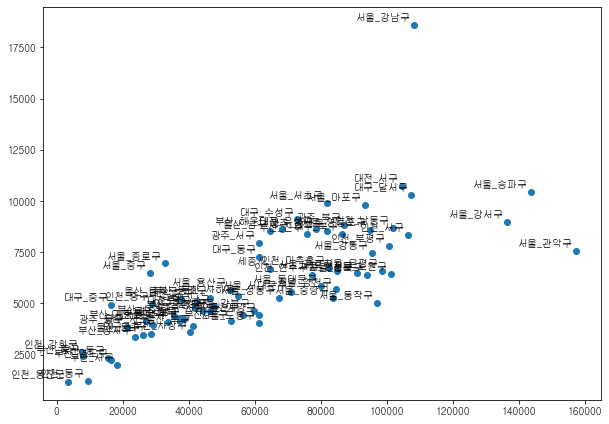

In [8]:
#그래프 표시
labels = df_x['시군구'] #라벨 갯수

plt.figure(figsize=(10, 7))

plt.subplots_adjust(bottom=0.1)

plt.scatter(df_x['청년인구'],df_x['인프라수'], label='True Position')

for label, x, y in zip(labels, df_x['청년인구'], df_x['인프라수']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()


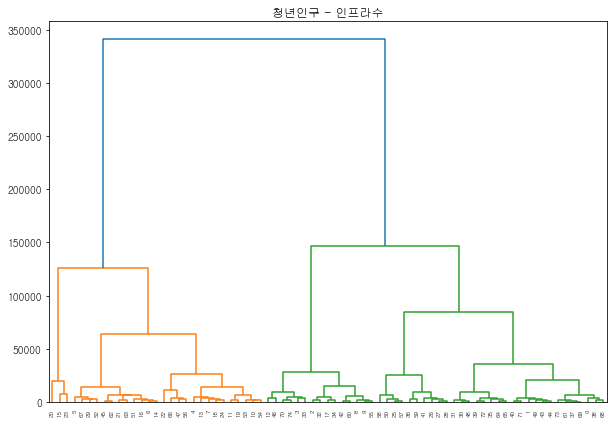

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage #계층적 군집분석시 필요
from matplotlib import pyplot as plt

df_Den = df_x.reindex(columns=['청년인구','인프라수'])

linked = linkage(df_Den, 'single')

labelList = df_x['시군구']


import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("청년인구 - 인프라수")
dend = shc.dendrogram(shc.linkage(df_Den, method='ward'))

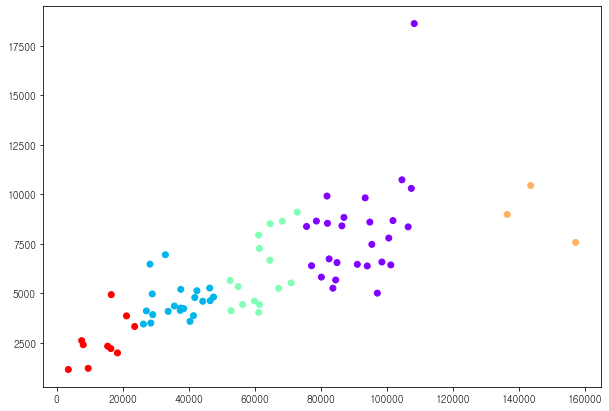

In [11]:
#군집분석 결과
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_Den)

plt.figure(figsize=(10, 7))
plt.scatter(df_Den['청년인구'], df_Den['인프라수'], c=cluster.labels_, cmap='rainbow')